In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

# **1) Data Analysis**

In [4]:
D_df = pd.read_csv('/content/drive/MyDrive/Projects/Major Project/diabetes.csv')

In [5]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
D_df.shape

(768, 9)

In [7]:
D_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


# **Note**

0 = NON-DIABETIC

1 = DIABETIC

In [8]:
D_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: xlabel='Age', ylabel='Count'>

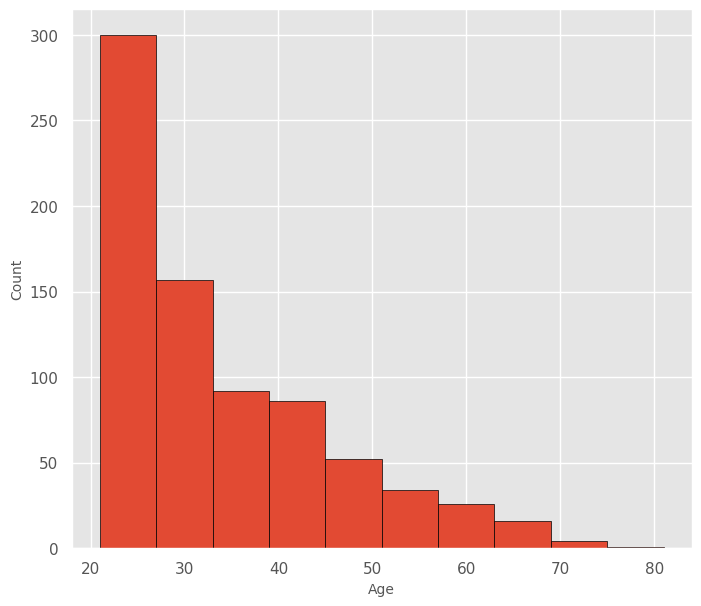

In [9]:
# plot the hist of the age feature
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
D_df['Age'].hist(edgecolor="black")

**Note**

We can clearly see that people with high "Glucose" and "Insulin" levels are diabetics

In [10]:
x = D_df.drop(columns = 'Outcome', axis=1)
y = D_df['Outcome']

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# **2) Data Preprocessing**

In [13]:
D_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
D_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = D_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [15]:
D_df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [16]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
#median
def median_target(var):
    temp = D_df[D_df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [18]:
columns = D_df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    D_df.loc[(D_df['Outcome'] == 0 ) & (D_df[i].isnull()), i] = median_target(i)[i][0]
    D_df.loc[(D_df['Outcome'] == 1 ) & (D_df[i].isnull()), i] = median_target(i)[i][1]


In [19]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
D_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in D_df:
    Q1 = D_df[feature].quantile(0.25)
    Q3 = D_df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if D_df[(D_df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

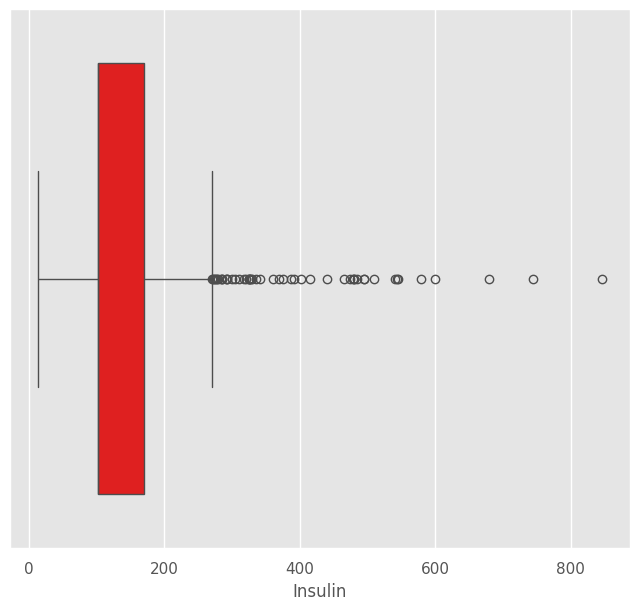

In [22]:
plt.figure(figsize=(8,7))
sns.boxplot(x= D_df["Insulin"], color="red")

In [23]:
Q1 = D_df.Insulin.quantile(0.25)
Q3 = D_df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
D_df.loc[D_df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

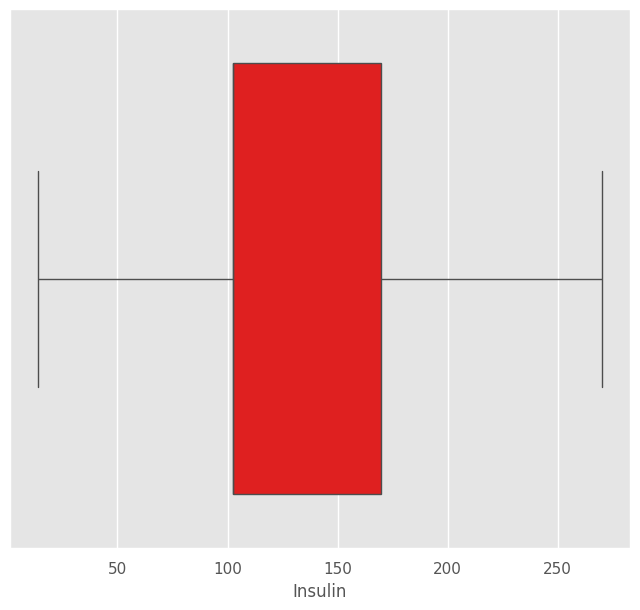

In [24]:
plt.figure(figsize=(8,7))
sns.boxplot(x= D_df["Insulin"], color="red")

In [25]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(D_df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

<Axes: xlabel='Pregnancies'>

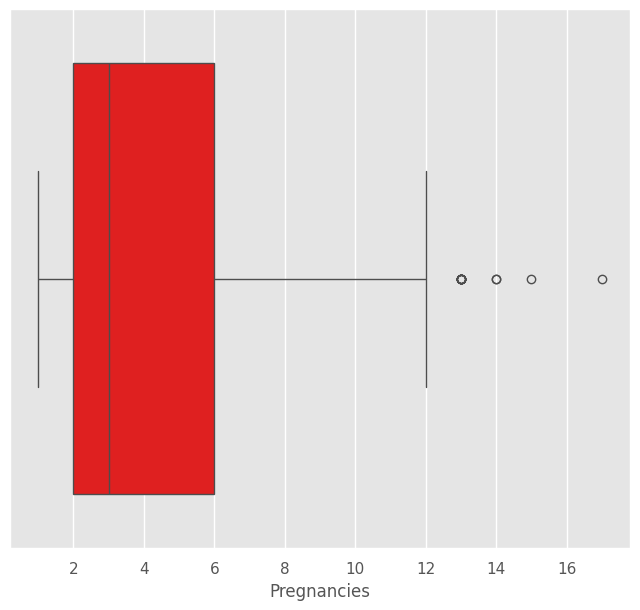

In [26]:

plt.figure(figsize=(8,7))
sns.boxplot(x= D_df["Pregnancies"], color="red")

In [27]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [28]:
thresold = np.sort(df_scores)[7]

In [29]:
outlier = df_scores>thresold

In [30]:
D_df = D_df[outlier]

In [31]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
D_df.shape

(760, 9)

<Axes: xlabel='Pregnancies'>

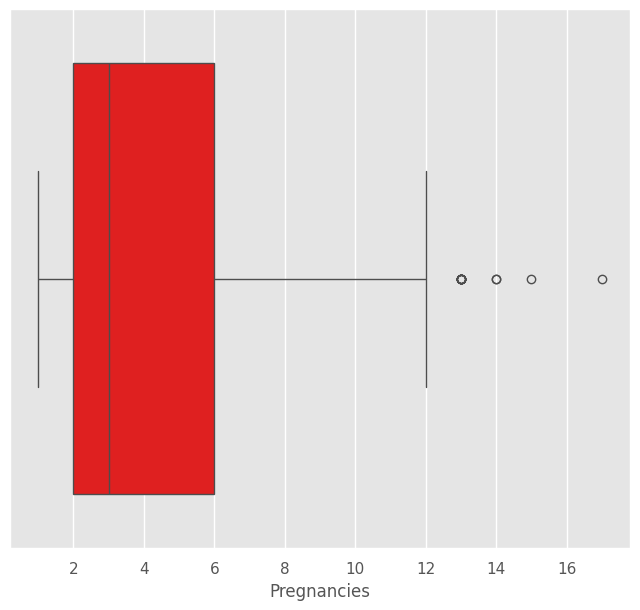

In [33]:
plt.figure(figsize=(8,7))
sns.boxplot(x= D_df["Pregnancies"], color="red")

In [34]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [35]:
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [36]:
D_df['NewBMI'] = NewBMI
D_df.loc[D_df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
D_df.loc[(D_df["BMI"]>18.5) & D_df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
D_df.loc[(D_df["BMI"]>24.9) & D_df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
D_df.loc[(D_df["BMI"]>29.9) & D_df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
D_df.loc[(D_df["BMI"]>34.9) & D_df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
D_df.loc[D_df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [37]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [38]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [39]:
D_df = D_df.assign(NewInsulinScore=D_df.apply(set_insuline, axis=1))

In [40]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [41]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
D_df["NewGlucose"] = NewGlucose
D_df.loc[D_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
D_df.loc[(D_df["Glucose"] > 70) & (D_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
D_df.loc[(D_df["Glucose"] > 99) & (D_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
D_df.loc[D_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [42]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [43]:
# One hot encoding
D_df = pd.get_dummies(D_df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [44]:
D_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [45]:
D_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [46]:
categorical_df = D_df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [47]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [48]:
y=D_df['Outcome']
X=D_df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [49]:
cols = X.columns
index = X.index

In [50]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


# **2) Data standardiztion**

In [51]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [52]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [53]:
X = pd.concat([X, categorical_df], axis=1)

In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,False,True,False,False,False,False,False,False,False,True
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,True,False,False,False,True,False,True,False,False
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,True,False,False,False,False,False,False,False,True
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,True,False,False,False,True,False,True,False,False
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [55]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [56]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4) Creating and Training the models**

**1) SVM**

In [57]:
classifier = SVC(kernel='linear')

In [58]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

since the accuracy of the model is very low(
  [Accuracy score of training data :  0.78],
  [Accuracy score of test data :  0.77]
  ), we are going to perform hyperparameter tuning using grid search cv

In [59]:
svc = SVC(probability=True, kernel='linear')
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [60]:
# best_parameter
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [61]:
grid_search.best_score_

0.8305378674976291

In [62]:
svc = SVC(C=0.01, gamma = 0.0001, probability=True, kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy score of training data : ', accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print('Accuracy score of test data : ',accuracy_score(y_test, svc.predict(X_test)))

print(classification_report(y_test, y_pred))

Accuracy score of training data :  0.8305921052631579
Accuracy score of test data :  0.881578947368421
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        98
           1       0.80      0.89      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.88      0.87       152
weighted avg       0.89      0.88      0.88       152



**2) Logistic Regression**

In [63]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

**3) KNN**

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**4) Decision Tree**

In [65]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [67]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [68]:
grid_search_dt.best_score_

0.8734615384615384

In [69]:
DT = grid_search_dt.best_estimator_

print('Accuracy score of training data : ', accuracy_score(y_train, DT.predict(X_train)))

dt_acc = accuracy_score(y_test, DT.predict(X_test))
print('Accuracy score of test data : ',accuracy_score(y_test, DT.predict(X_test)))

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy score of training data :  0.8766447368421053
Accuracy score of test data :  0.8421052631578947
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        98
           1       0.88      0.65      0.74        54

    accuracy                           0.84       152
   macro avg       0.85      0.80      0.82       152
weighted avg       0.85      0.84      0.84       152



**5) Random forest classifier**

In [70]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

**6) Gradient boost classifier**

In [71]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [72]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [73]:
grid_search_gbc.best_score_

0.888032786885246

In [74]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

**7) XGBoost**

In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# **5) Model Evaluation**

**1) Accuracy Score for SVM**

In [76]:
# accuracy score of model on training data
X_train_accuracy = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_accuracy, y_train)

In [77]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8305921052631579


In [78]:
# accuracy score of model on test data
X_test_accuracy = classifier.predict(X_test)
svm_acc = accuracy_score(X_test_accuracy, y_test)

In [79]:
print('Accuracy score of test data : ', svm_acc)

Accuracy score of test data :  0.881578947368421


**2) Accuracy score for logistic regression**

In [80]:
# accuracy score of model on training data
print('Accuracy score of training data : ', accuracy_score(y_train, log_reg.predict(X_train)))

Accuracy score of training data :  0.8470394736842105


In [81]:
# accuracy score of model on training data
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print('Accuracy score of test data : ',log_reg_acc)

Accuracy score of test data :  0.8947368421052632


**3)  Accuracy score for KNN**

In [82]:
# accuracy score of model on training data
print('Accuracy score of training data : ',accuracy_score(y_train, knn.predict(X_train)))

# accuracy score of model on test data
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print('Accuracy score of test data : ',knn_acc)

Accuracy score of training data :  0.875
Accuracy score of test data :  0.881578947368421


In [83]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



**4) Accuracy score for Decision Tree**

In [84]:
# accuracy score of model on training data
print('Accuracy score of training data before hyperparameter tuning: ',accuracy_score(y_train, DT.predict(X_train)))
# accuracy score of model on test data
print('Accuracy score of test data before hyperparameter tuning: ',accuracy_score(y_test, DT.predict(X_test)))

Accuracy score of training data before hyperparameter tuning:  0.8766447368421053
Accuracy score of test data before hyperparameter tuning:  0.8421052631578947


In [85]:
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        98
           1       0.88      0.65      0.74        54

    accuracy                           0.84       152
   macro avg       0.85      0.80      0.82       152
weighted avg       0.85      0.84      0.84       152



**5) Accuracy score for Random forest**

In [86]:
# accuracy score of model on training data
print('Accuracy score of training data before hyperparameter tuning: ',accuracy_score(y_train, rand_clf.predict(X_train)))

rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
# accuracy score of model on test data
print('Accuracy score of test data before hyperparameter tuning: ',accuracy_score(y_test, rand_clf.predict(X_test)))

y_pred = rand_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy score of training data before hyperparameter tuning:  0.993421052631579
Accuracy score of test data before hyperparameter tuning:  0.9144736842105263
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.89      0.88        54

    accuracy                           0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



**6) Accuracy score for Gradient boost classifier**

In [87]:
gbc = grid_search_gbc.best_estimator_

# accuracy score of model on training data
print('Accuracy score of training data before hyperparameter tuning: ',accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
# accuracy score of model on test data
print('Accuracy score of test data before hyperparameter tuning: ',accuracy_score(y_test, gbc.predict(X_test)))

y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy score of training data before hyperparameter tuning:  0.9983552631578947
Accuracy score of test data before hyperparameter tuning:  0.9078947368421053
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



**7) Accuracy score for XGBoost classifier**

In [88]:
# accuracy score of model on training data
print('Accuracy score of training data before hyperparameter tuning: ',accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
# accuracy score of model on test data
print('Accuracy score of test data before hyperparameter tuning: ',accuracy_score(y_test, xgb.predict(X_test)))

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy score of training data before hyperparameter tuning:  0.9736842105263158
Accuracy score of test data before hyperparameter tuning:  0.881578947368421
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.83      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



# **6) Model Comparison**

In [89]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,91.45
5,Gradient Boosting Classifier,90.79
0,Logistic Regression,89.47
1,KNN,88.16
2,SVM,88.16
6,XgBoost,88.16
3,Decision Tree Classifier,84.21


# **7) Implementing Explainable AI**


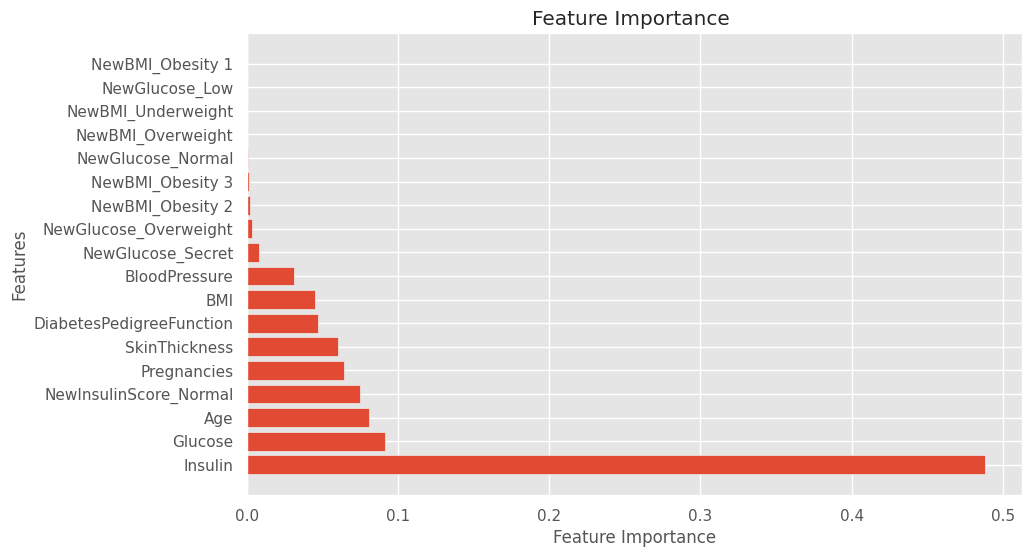

In [113]:
# Assuming `model` is your trained GBC
import matplotlib.pyplot as plt

# Get feature importance
importance = rand_clf.feature_importances_

# Sort features by importance
indices = np.argsort(importance)[::-1]

features = [X.columns[i] for i in indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance ')
plt.show()